# Aviation Accident Analysis

  # 1. Business Understanding

  ### Problem Statement

A company is expanding into new industries to diversify its portfolio, with a specific interest in acquiring and operating airplanes for both commercial and private ventures. However, they lack knowledge about the potential risks associated with aircraft. The objective is to identify which aircraft pose the lowest risk for the company to enter this new market. These findings should be converted into actionable insights to guide the head of the new aviation division in making informed decisions about aircraft purchases.

  ### Goal

The objective of this project is to employ data cleaning, imputation, analysis, and visualization to generate valuable insights for a business stakeholder interested in acquiring and operating airplanes for commercial and private ventures.

The goal is to convert these findings into actionable insights that will assist the head of the new aviation division in making informed decisions about which aircraft to purchase.

  ### Objectives

  ### General Objective

To determine which aircraft are least likely to be involved in accidents. This information will assist the head of the new aviation division in making informed decisions on which aircraft to purchase and operate for commercial and private ventures.

  ### General Objectives

1. To understand the problem statement, the project's objectives, and the dataset utilized.
2. To apply data cleaning techniques to generate actionable insights.
3. To analyze the data through univariate and bivariate analysis of variables.

# 2. Data Understanding

### Importing Libraries

Through importing various types of libraries we'll be able to understand the aviation dataset much easier.

In [1]:
#Pandas is especially well-suited to handling tabular data (represented as rows and columns).
import pandas as pd
#Numpy provides useful functionality for mathematical operations on vectors and matrices in Python.
import numpy as np
#Matplotlib is tailored for the generation of simple and powerful visualizations.
import matplotlib.pyplot as plt
#Seaborn targets statistical data visualizations, which may be more time-consuming to implement using Matplotlib.
import seaborn as sns
#Helps display the calendar by importing the calendar module to our program.
import calendar
#Helps provides a way to control how warnings are handled within a Python script.
import warnings
warnings.filterwarnings("ignore")

  ### Data Description

The data used is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### Loading Datasets

I will use the aviation dataset which is provided by the National Transportation Safety Board.

In [2]:
data = pd.read_csv('AviationData.csv', encoding='latin1')
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Dataset Exploration

By exploring our data we'll be able to understand what it contains before we derive insights.

In [3]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
data.shape

(88889, 31)

The data has 88,889 rows and 31 columns.

In [6]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

5 of the columns contains float values and the other 26 columns are strings. The DataFrame has some missing values, indicated by the "Non-Null Count" column.

# 3. Data Preparation

## Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Missing Values

Through this we'll be able to know which columns in our dataset have missing values.

In [9]:
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [10]:
data.isnull().sum().sum()

564742

There are 564,742 missing values. To check the percentage of missing values in each column a formula will be used:

In [11]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)*100

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(data)
missing_data

,Missing Values,Percentage(%)
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


Through this we'll be able to know if we have any repeated rows in our dataset.

### Duplicates

In [12]:
data.duplicated().sum()

0

There are no duplicates in the dataset before handling missing values.

### Handling Missing Values

In [13]:
missing_data = identify_missing_values(data)
missing_data

,Missing Values,Percentage(%)
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


#### Imputation

These columns cannot be dropped because they are important for the analysis. Imputation will be used to deal with the missing values in these columns.

In [14]:
fill_rows = ['Air.carrier', 'FAR.Description', 'Purpose.of.flight', 'Engine.Type', 'Broad.phase.of.flight']
rows_to_fill = [fill for fill in fill_rows if fill in data.columns]
data[rows_to_fill] = data[rows_to_fill].fillna(value='None')

#### Dropping Rows

Rows where columns with missing values are below 15% will be dropped as most of the data will still be retained.

In [15]:
Drop_rows = ['Total.Fatal.Injuries','Total.Uninjured','Total.Minor.Injuries','Aircraft.damage','Total.Setrious.Injuries',
             'Injury.Severity','Location', 'Country', 'Make', 'Model', 'Amateur.Built','Weather.Condition', 
             'Number.of.Engines','Total.Serious.Injuries','Aircraft.Category']
rows_to_drop = [row for row in Drop_rows if row in data.columns]
data = data.dropna(subset=rows_to_drop)

#### Dropping Columns

Columns with missing values that will not be used in the analysis are dropped.

In [16]:
Drop_Columns = ['Latitude', 'Longitude', 'Schedule','Registration.Number', 'Publication.Date', 'Airport.Name', 
                'Airport.Code', 'Report.Status']
columns_to_drop = [col for col in Drop_Columns if col in data.columns]
data = data.drop(columns_to_drop, axis=1)

In [17]:
missing_data = identify_missing_values(data)
missing_data

,Missing Values,Percentage(%)


In [18]:
data.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [19]:
data.isnull().sum().sum()

0

There are no missing values in the dataset.

In [20]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [21]:
data.shape

(23069, 23)

The dataset has 23,069 rows and 23 columns.

### Checking for duplicates after handling missing values

In [22]:
data.duplicated().sum()

1

There is 1 duplicate in our dataset after handling missing values

### Handling Duplicates

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.duplicated().sum()

0

In [25]:
data.shape

(23068, 23)

After removing the duplicate row the dataset has 23,068 rows and 23 columns.

### Type Conversion

This is the process of converting data of one type to another.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 7 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                23068 non-null  object 
 1   Investigation.Type      23068 non-null  object 
 2   Accident.Number         23068 non-null  object 
 3   Event.Date              23068 non-null  object 
 4   Location                23068 non-null  object 
 5   Country                 23068 non-null  object 
 6   Injury.Severity         23068 non-null  object 
 7   Aircraft.damage         23068 non-null  object 
 8   Aircraft.Category       23068 non-null  object 
 9   Make                    23068 non-null  object 
 10  Model                   23068 non-null  object 
 11  Amateur.Built           23068 non-null  object 
 12  Number.of.Engines       23068 non-null  float64
 13  Engine.Type             23068 non-null  object 
 14  FAR.Description         23068 non-null

In [27]:
Int_Conversion = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                  'Total.Uninjured' ]
for column in Int_Conversion:
    data[column] = data[column].astype(int)

In [28]:
# Format the date into the pandas date format
data['Event.Date'] = pd.to_datetime(data['Event.Date'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 7 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                23068 non-null  object        
 1   Investigation.Type      23068 non-null  object        
 2   Accident.Number         23068 non-null  object        
 3   Event.Date              23068 non-null  datetime64[ns]
 4   Location                23068 non-null  object        
 5   Country                 23068 non-null  object        
 6   Injury.Severity         23068 non-null  object        
 7   Aircraft.damage         23068 non-null  object        
 8   Aircraft.Category       23068 non-null  object        
 9   Make                    23068 non-null  object        
 10  Model                   23068 non-null  object        
 11  Amateur.Built           23068 non-null  object        
 12  Number.of.Engines       23068 non-null  int32 

### Data Consistency

In [30]:
# Get a list of unique values in the 'Make' column
unique_makes = data['Make'].unique()

print("Unique makes:", unique_makes)

Unique makes: ['Cessna' 'Bellanca' 'Navion' ... 'CHILDS MICHAEL  A' 'GREG HOBBS'
 'ORLICAN S R O']


In [31]:
# Convert 'Make' column to lowercase and then capitalize the first letter
data['Make'] = data['Make'].str.lower().str.capitalize()
data['Make']

7                            Cessna
8                            Cessna
12                         Bellanca
13                           Cessna
14                           Navion
                    ...            
88859      Arado-flugzeugwerke gmbh
88865                        Cessna
88873            Cirrus design corp
88877                        Cessna
88886    American champion aircraft
Name: Make, Length: 23068, dtype: object

In [32]:
# Get a list of unique values in the 'Weather.Condition' column
unique_makes = data['Weather.Condition'].unique()

print("Unique makes:", unique_makes)

Unique makes: ['VMC' 'IMC' 'UNK' 'Unk']


In [33]:
# Convert 'Weather.Condition'' column to lowercase and then capitalize the first letter
data['Weather.Condition'] = data['Weather.Condition'].str.upper()
data['Weather.Condition']

7        VMC
8        IMC
12       IMC
13       IMC
14       IMC
        ... 
88859    VMC
88865    VMC
88873    VMC
88877    VMC
88886    VMC
Name: Weather.Condition, Length: 23068, dtype: object

# 4. Data Analysis

# Exploratory Data Analysis

### Univariate Analysis

### a) Event Month

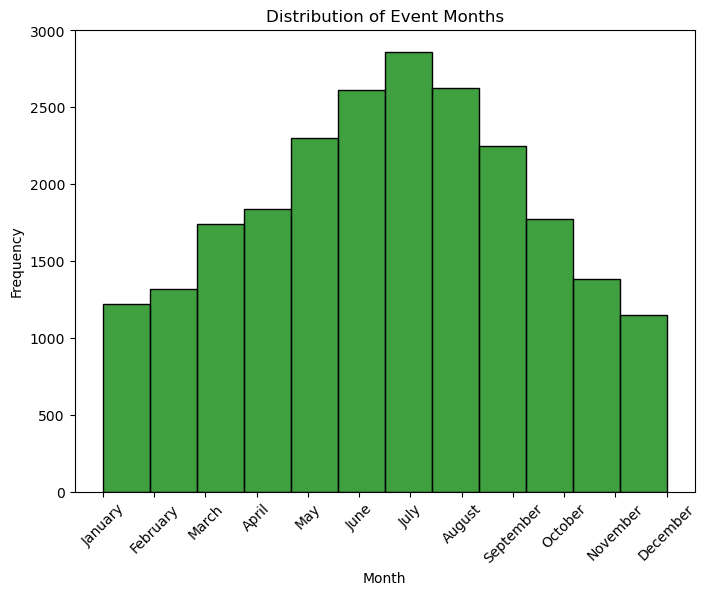

<Figure size 640x480 with 0 Axes>

In [34]:
# Convert 'Event.Date' to months
data['Month'] = data['Event.Date'].dt.month

# Create a histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=data, x='Month', color='green', bins=12)

# Set the x-axis labels to full month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45) 

plt.title('Distribution of Event Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

plt.savefig('Distribution of Event Months.png');

Most of the accidents happen between June, July and August. This can be attributed to the season of summer where most people are on holidays and are travelling more.

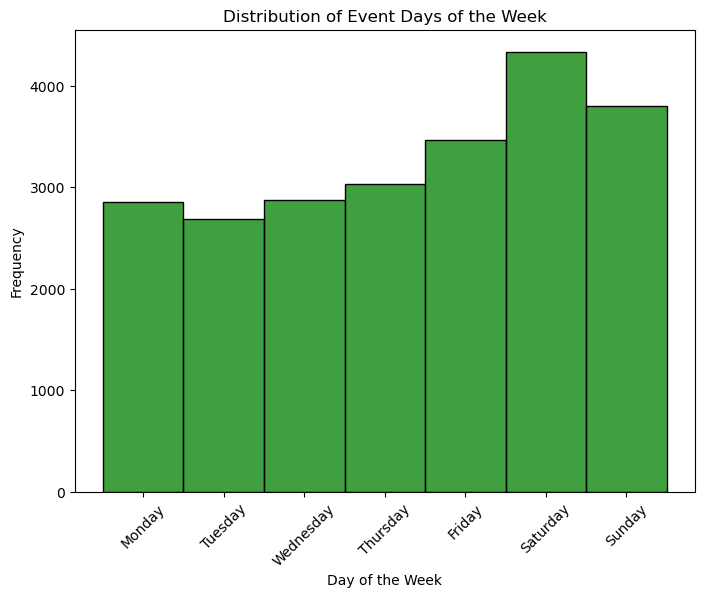

<Figure size 640x480 with 0 Axes>

In [35]:
# Extract the day of the week from the 'Event.Date' column
data['Day_of_Week'] = data['Event.Date'].dt.day_name()

# Specify the order of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the data by the order of days_of_week
data['Day_of_Week'] = pd.Categorical(data['Day_of_Week'], categories=days_of_week, ordered=True)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Day_of_Week', color='green', bins=7, discrete=True)
plt.title('Distribution of Event Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Event Days.png');

Most of the accidents also happen between Friday, Saturday and Sunday. This can be attributed to the weekend where most people are also travelling more.

### b) Aircraft Category

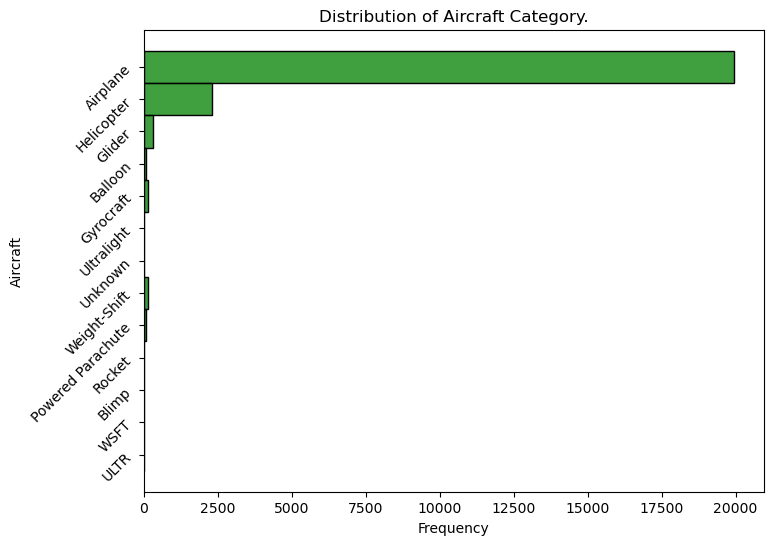

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, y='Aircraft.Category', color='green', bins=15)
plt.title('Distribution of Aircraft Category.')
plt.xlabel('Frequency')
plt.ylabel('Aircraft')
plt.yticks(rotation=45)
plt.show()

plt.savefig('Distribution of Aircraft Category.png');

Airplanes are more prone to accidents whereby Helicopters, Gliders and Gyrocraft are less likely to be in accidents.

### c) Make

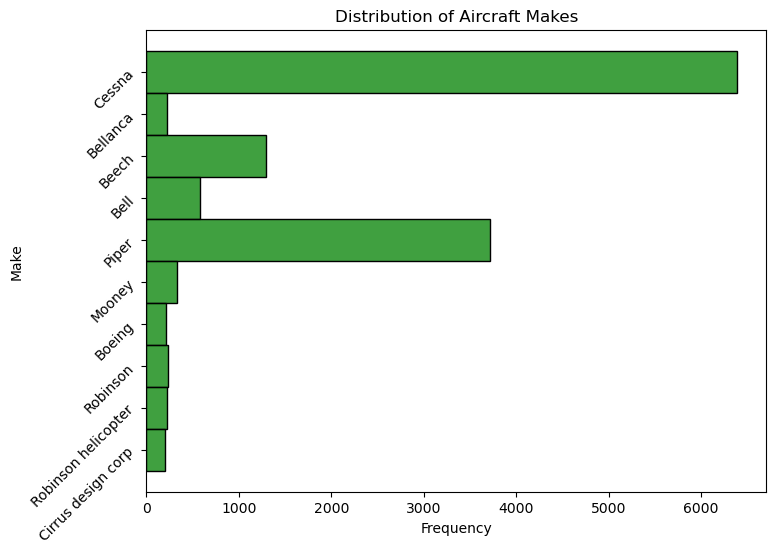

<Figure size 640x480 with 0 Axes>

In [37]:
# Get the top 10 makes
top_10_makes = data['Make'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 makes
top_10_data = data[data['Make'].isin(top_10_makes)]

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=top_10_data, y='Make', color='green', bins=10)
plt.title('Distribution of Aircraft Makes')
plt.xlabel('Frequency')
plt.ylabel('Make')
plt.yticks(rotation=45)
plt.show()

plt.savefig('Distribution of Aircraft Makes.png');

Cessna, Piper, and Beech are makes of aircrafts with more aviation accidents.

### d) Engine Type

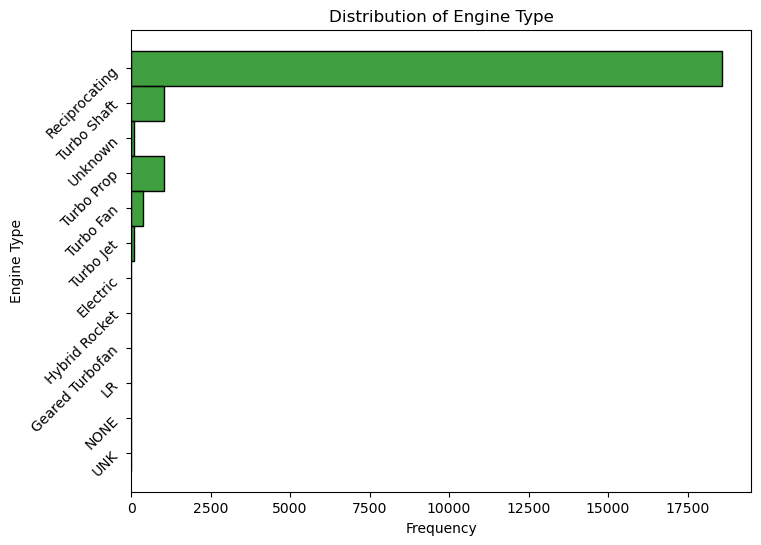

<Figure size 640x480 with 0 Axes>

In [38]:
# Filter out rows with 'None' in the Engine Type column
filtered_data = data[data['Engine.Type'] != 'None']

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_data, y='Engine.Type', color='green', bins=13)
plt.title('Distribution of Engine Type')
plt.ylabel('Engine Type')
plt.yticks(rotation=45)
plt.xlabel('Frequency')
plt.show()

plt.savefig('Distribution of Engine Type.png');

Aircrafts with Reciprocating Engine Type have a high chance of being in an accident.

### e) Engine Number

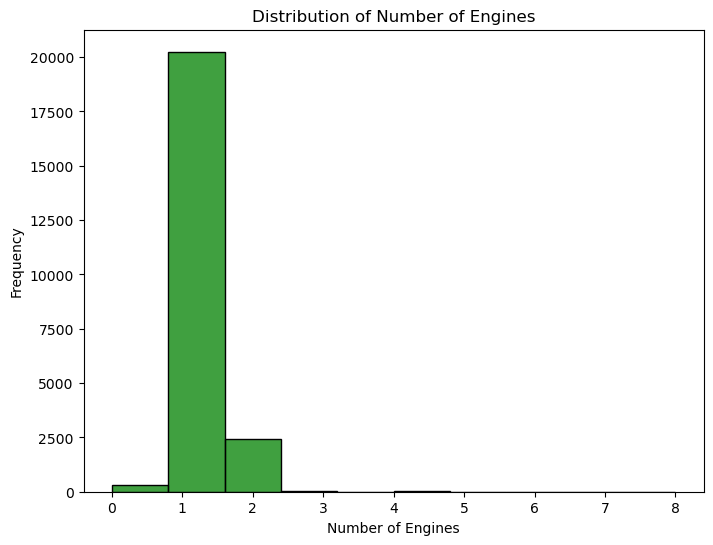

<Figure size 640x480 with 0 Axes>

In [39]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Number.of.Engines', color='green', bins=10)
plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.show()

plt.savefig('Distribution of Engine Numbers.png');

1 engine aircrafts have more counts of accidents.

### f) Flight Purpose

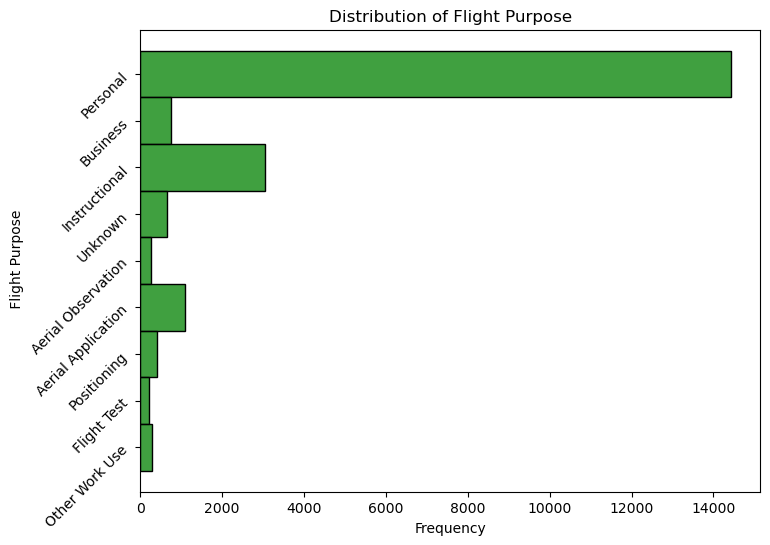

<Figure size 640x480 with 0 Axes>

In [40]:
top_10 = data['Purpose.of.flight'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 makes
top_10_data = data[data['Purpose.of.flight'].isin(top_10) & 
                            (data['Purpose.of.flight'] != 'None')]

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=top_10_data, y='Purpose.of.flight', color='green', bins=10)
plt.title('Distribution of Flight Purpose')
plt.ylabel(' Flight Purpose')
plt.yticks(rotation=45)
plt.xlabel('Frequency')
plt.show()

plt.savefig('Distribution of Flight Purpose.png');

Top five flight purposes for the aircrafts that are involved in accidents are personal, instructional, aerial application, business and positioning. Since the stakeholder is looking to purchase and operate aircrafts for commercial and private enterprises this is the main variable  to be used in the bivariate analysis. 

### Bivariate Analysis

### a) Flight Purpose and Make

<Figure size 800x600 with 0 Axes>

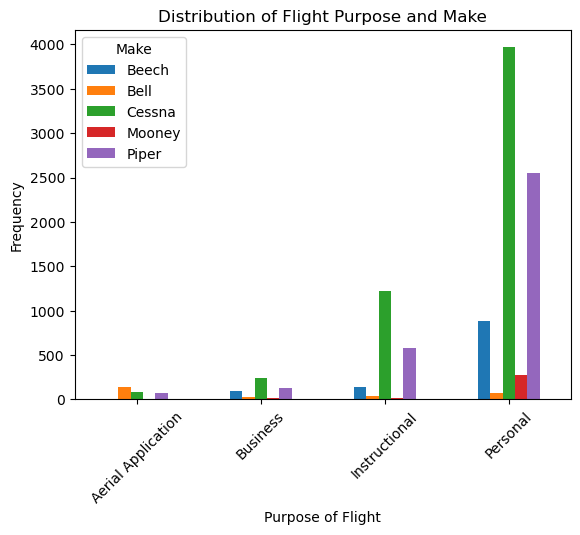

<Figure size 640x480 with 0 Axes>

In [41]:
# Get the top 5 values for 'Purpose of Flight' and 'Make'
top_5_purpose = data['Purpose.of.flight'].value_counts().head(5).index.tolist()
top_5_make = data['Make'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 values for both columns and exclude 'None'
filtered_data = data[(data['Purpose.of.flight'].isin(top_5_purpose)) & (data['Purpose.of.flight']
                              != 'None') & (data['Make'].isin(top_5_make)) & (data['Make'] != 'None')]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Make'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Make')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Make')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Make.png');

Aircrafts of the make Bell or Mooney are less prone to accidents.

### b) Flight Purpose and Aircraft Category

<Figure size 800x600 with 0 Axes>

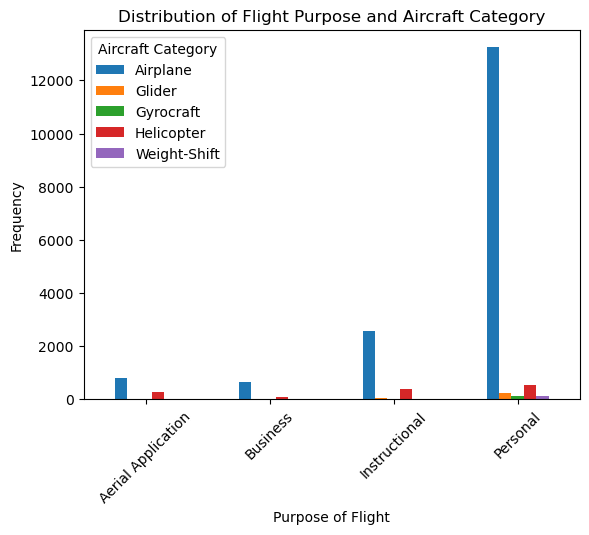

<Figure size 640x480 with 0 Axes>

In [42]:
# Get the top 5 values
top_5_purpose = data['Purpose.of.flight'].value_counts().head(5).index.tolist()
top_5_category = data['Aircraft.Category'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 values and exclude 'None
filtered_data = data[(data['Purpose.of.flight'].isin(top_5_purpose)) & (data['Purpose.of.flight']
                              != 'None') & (data['Aircraft.Category'].isin(top_5_category))]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Aircraft.Category'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Aircraft Category')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Aircraft Category')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Aircraft Category.png');

 A helicopter instead of an Airplane is less risky.

### c) Flight Purpose and Engine Type

<Figure size 800x600 with 0 Axes>

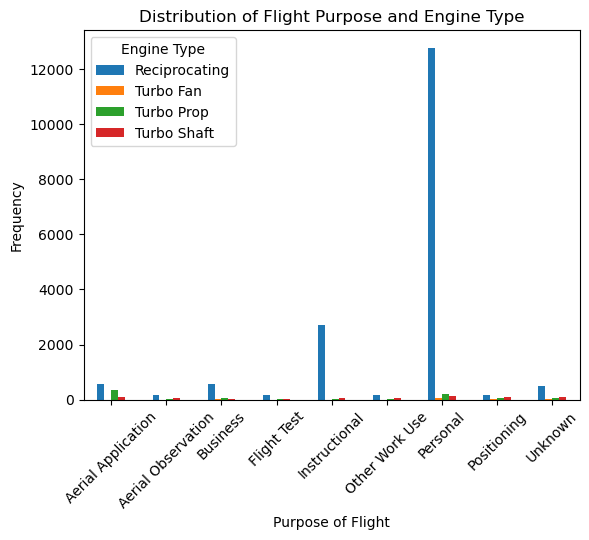

<Figure size 640x480 with 0 Axes>

In [43]:
# Get the top values for the columns
top_5_purpose = data['Purpose.of.flight'].value_counts().head(10).index.tolist()
top_5_type = data['Engine.Type'].value_counts().head(5).index.tolist()

# Filter the data to include only the top values and exclude 'None
filtered_data = data[(data['Purpose.of.flight'].isin(top_5_purpose)) & (data['Purpose.of.flight']
                              != 'None') & (data['Engine.Type'].isin(top_5_type)) & 
                              (data['Engine.Type'] != 'None')]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Engine.Type'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Engine Type')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Engine Type')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Engine Type.png');

Aircrafts with engine type of Turbo Shaft, Turbo Fan, Turbo Prop are not as prone to accidents as the reciprocating engine.

## 5. Conclusion

For data cleaning, missing values were addressed, duplicates were eliminated, type conversions were performed, and data consistency was ensured by standardizing string formats in certain columns.

The top five flight purposes for aircraft involved in accidents were personal, instructional, aerial application, business, and positioning. Given that the stakeholder plans to purchase and operate aircraft for both commercial and private use, this variable was the focus of the bivariate analysis.

## 6. Recommendations

The head of the new aviation division is advised to consider the following:

1. Purchase aircrafts from the Bell or Mooney manufacturers.
2. Opt for a helicopter over an airplane.
3. Choose aircrafts with Turbo Shaft, Turbo Fan, or Turbo Prop engine types.